In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-02-05,170.199997,170.550003,167.699997,170.309998,170.309998,55081300,AMAZON
2024-02-06,169.389999,170.710007,167.649994,169.149994,169.149994,42505500,AMAZON
2024-02-07,169.479996,170.880005,168.940002,170.529999,170.529999,47174100,AMAZON
2024-02-08,169.649994,171.429993,168.880005,169.839996,169.839996,42316500,AMAZON
2024-02-09,170.899994,175.000000,170.580002,174.449997,174.449997,56986000,AMAZON
2024-02-12,174.800003,175.389999,171.539993,172.339996,172.339996,51050400,AMAZON
2024-02-13,167.729996,170.949997,165.750000,168.639999,168.639999,56345100,AMAZON
2024-02-14,169.210007,171.210007,168.279999,170.979996,170.979996,42815500,AMAZON
2024-02-15,170.580002,171.169998,167.589996,169.800003,169.800003,49855200,AMAZON


In [2]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,178.184423,179.671275,176.879123,178.389004,177.837499,5.696117e+07
std,12.922108,12.784910,12.866973,12.805021,12.946406,1.588340e+07
min,144.380005,146.710007,143.899994,145.309998,144.538513,2.404830e+07
25%,171.154999,173.105003,170.470001,171.805000,171.024612,4.694260e+07
50%,179.490005,180.750000,177.580002,179.360001,178.873627,5.337730e+07
75%,189.294998,189.990005,187.695000,189.334999,188.909798,6.212460e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.282567e+08


We have only 255 records in one year because weekends are not included in the data.

In [3]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-02-17 to 2024-02-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

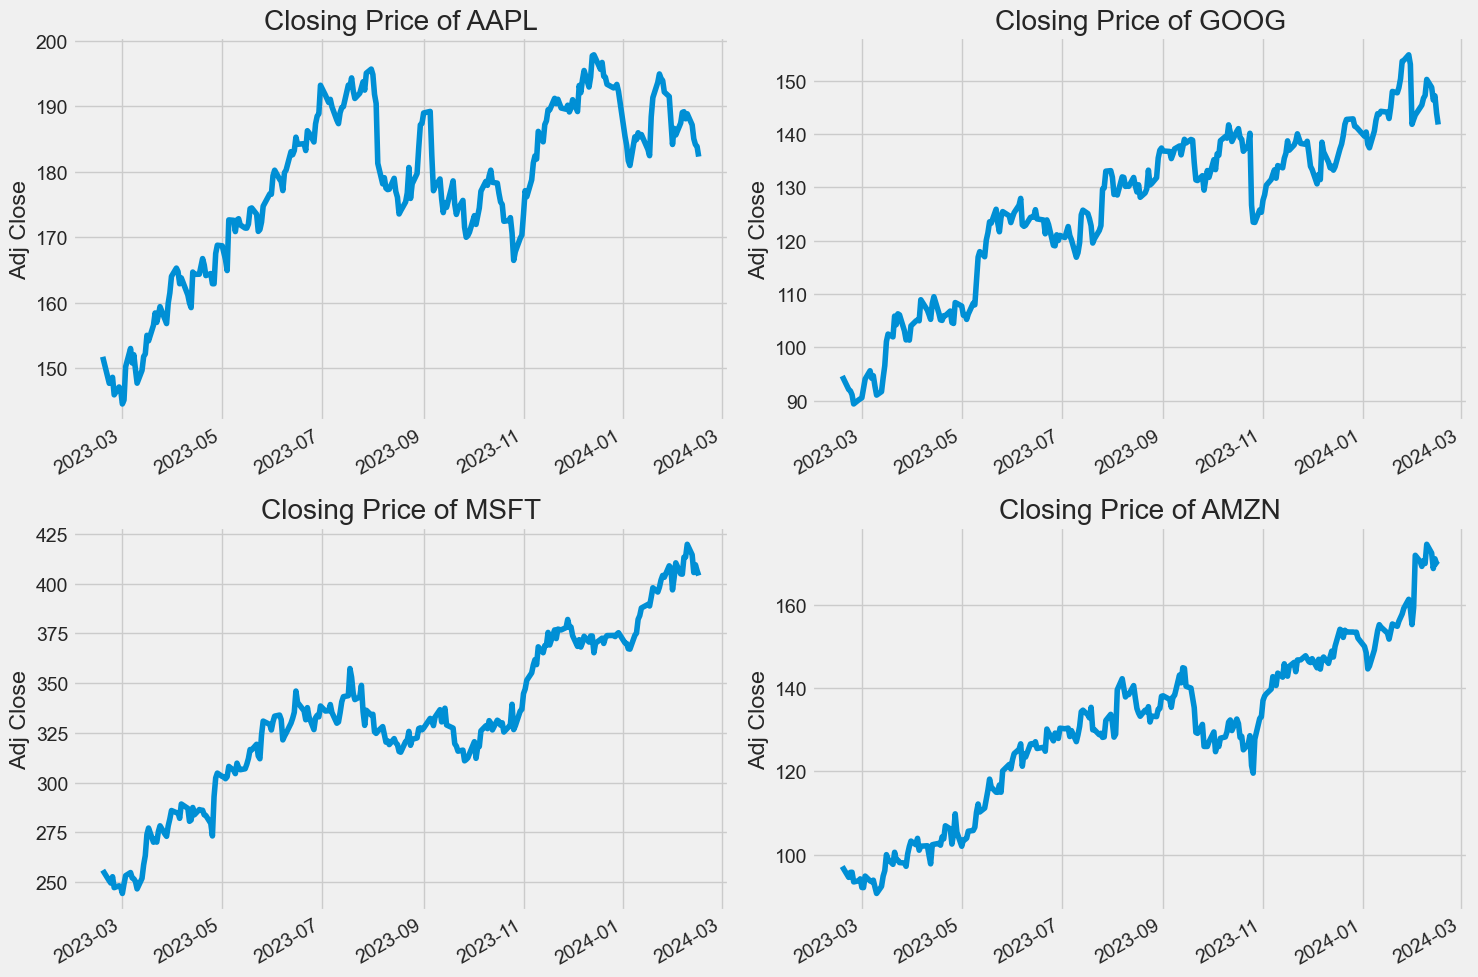

In [4]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

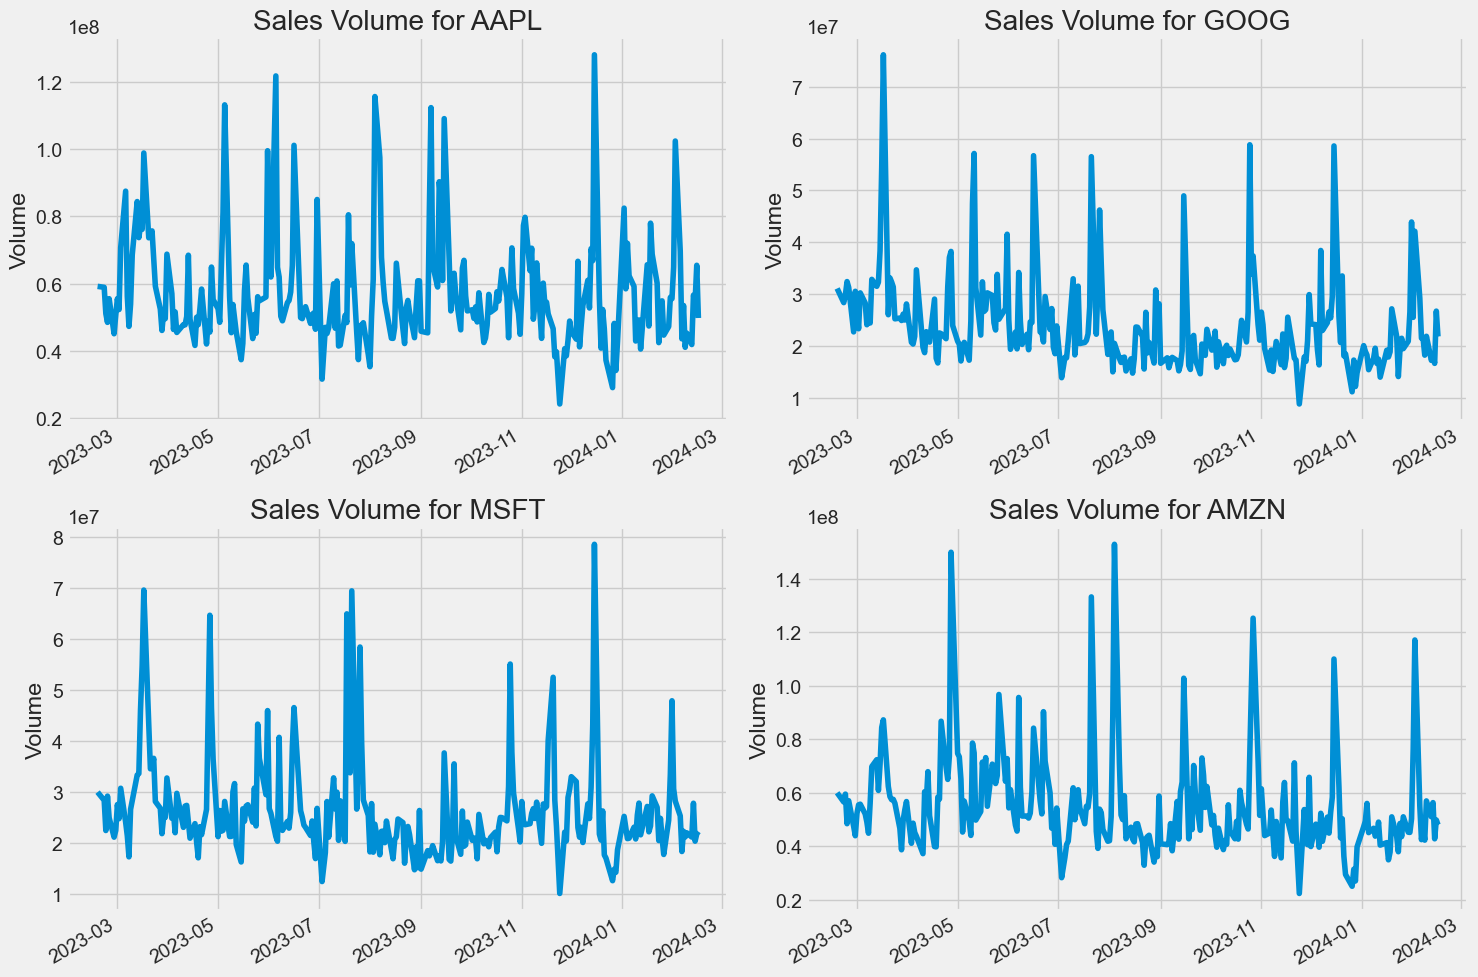

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

# Predicting the closing price stock price of APPLE inc:

In [6]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2015-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.435272,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.746885,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.749128,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.082134,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.007435,237458000
...,...,...,...,...,...,...
2024-02-12,188.419998,188.669998,186.789993,187.149994,187.149994,41781900
2024-02-13,185.770004,186.210007,183.509995,185.039993,185.039993,56529500
2024-02-14,185.320007,185.529999,182.440002,184.149994,184.149994,54630500


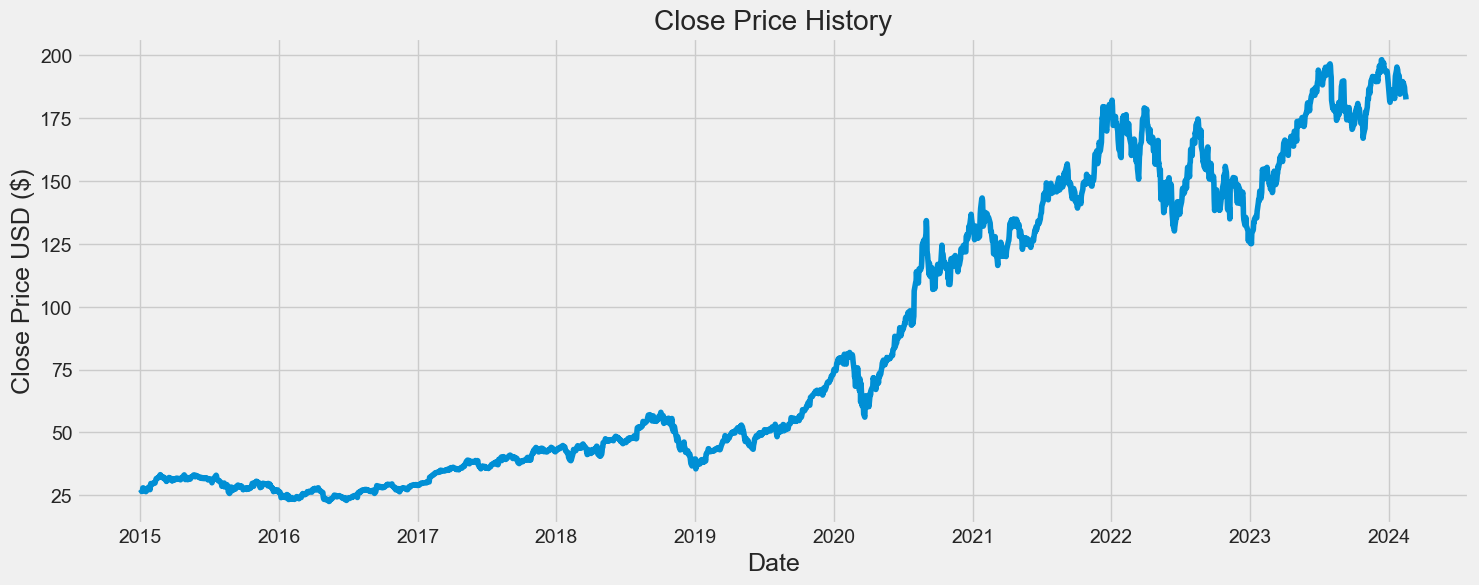

In [7]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [8]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2183

In [9]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02704744],
       [0.02266059],
       [0.02267484],
       ...,
       [0.92046713],
       [0.91881498],
       [0.90998432]])

In [10]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02704744, 0.02266059, 0.02267484, 0.02479704, 0.03069364,
       0.03086456, 0.02693349, 0.02831506, 0.02771686, 0.02347244,
       0.02229027, 0.02617861, 0.02736078, 0.03142003, 0.03224613,
       0.03241704, 0.02677682, 0.03556474, 0.04067797, 0.0381997 ,
       0.04029341, 0.0403219 , 0.041618  , 0.04215924, 0.0407207 ,
       0.0418459 , 0.04512178, 0.04919527, 0.05144567, 0.05232874,
       0.05339696, 0.05466458, 0.05428002, 0.05577554, 0.06076058,
       0.05957841, 0.05476427, 0.05708589, 0.05429427, 0.05519157,
       0.05557613, 0.0544082 , 0.05137446, 0.05164507, 0.05241419,
       0.04866829, 0.04543512, 0.04858282, 0.04735793, 0.04929497,
       0.05227176, 0.05430851, 0.05292694, 0.05064806, 0.05251389,
       0.05177326, 0.04705882, 0.04828372, 0.04687367, 0.05131748])]
[0.04855434221753735]

[array([0.02704744, 0.02266059, 0.02267484, 0.02479704, 0.03069364,
       0.03086456, 0.02693349, 0.02831506, 0.02771686, 0.02347244,
       0.02229027, 0.02617861, 0.02

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=3, epochs=5)

Epoch 1/5
708/708 [==============================] - 12s 16ms/step - loss: 0.0020
Epoch 2/5
708/708 [==============================] - 11s 16ms/step - loss: 7.2815e-04
Epoch 3/5
708/708 [==============================] - 11s 16ms/step - loss: 7.3222e-04
Epoch 4/5
708/708 [==============================] - 11s 16ms/step - loss: 7.4056e-04
Epoch 5/5
708/708 [==============================] - 11s 16ms/step - loss: 5.8704e-04


In [12]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 0s 9ms/step


4.298135661386098

/var/folders/nk/vdwbtvd9651968dbb1r0t29r0000gn/T/ipykernel_14275/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


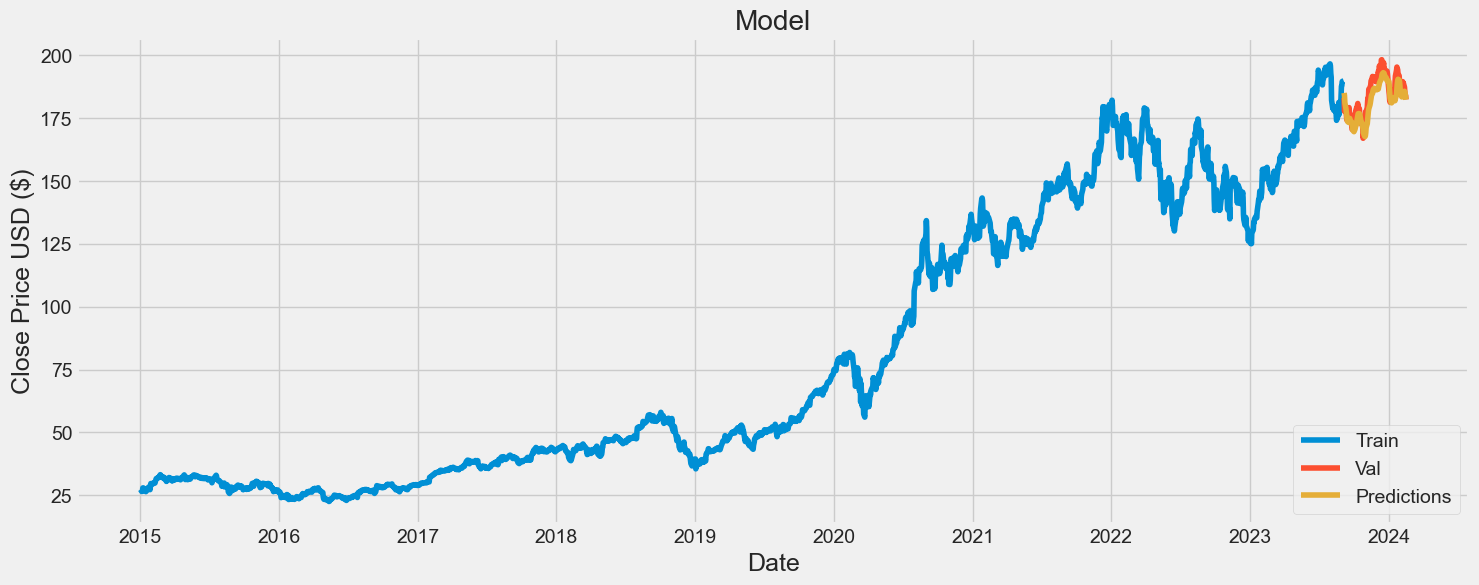

In [13]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [14]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-09-06,182.910004,184.892746
2023-09-07,177.559998,183.802490
2023-09-08,178.179993,180.965149
2023-09-11,179.360001,178.498505
2023-09-12,176.300003,177.106430
...,...,...
2024-02-12,187.149994,185.557495
2024-02-13,185.039993,185.234924
2024-02-14,184.149994,184.281937
